In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SE', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

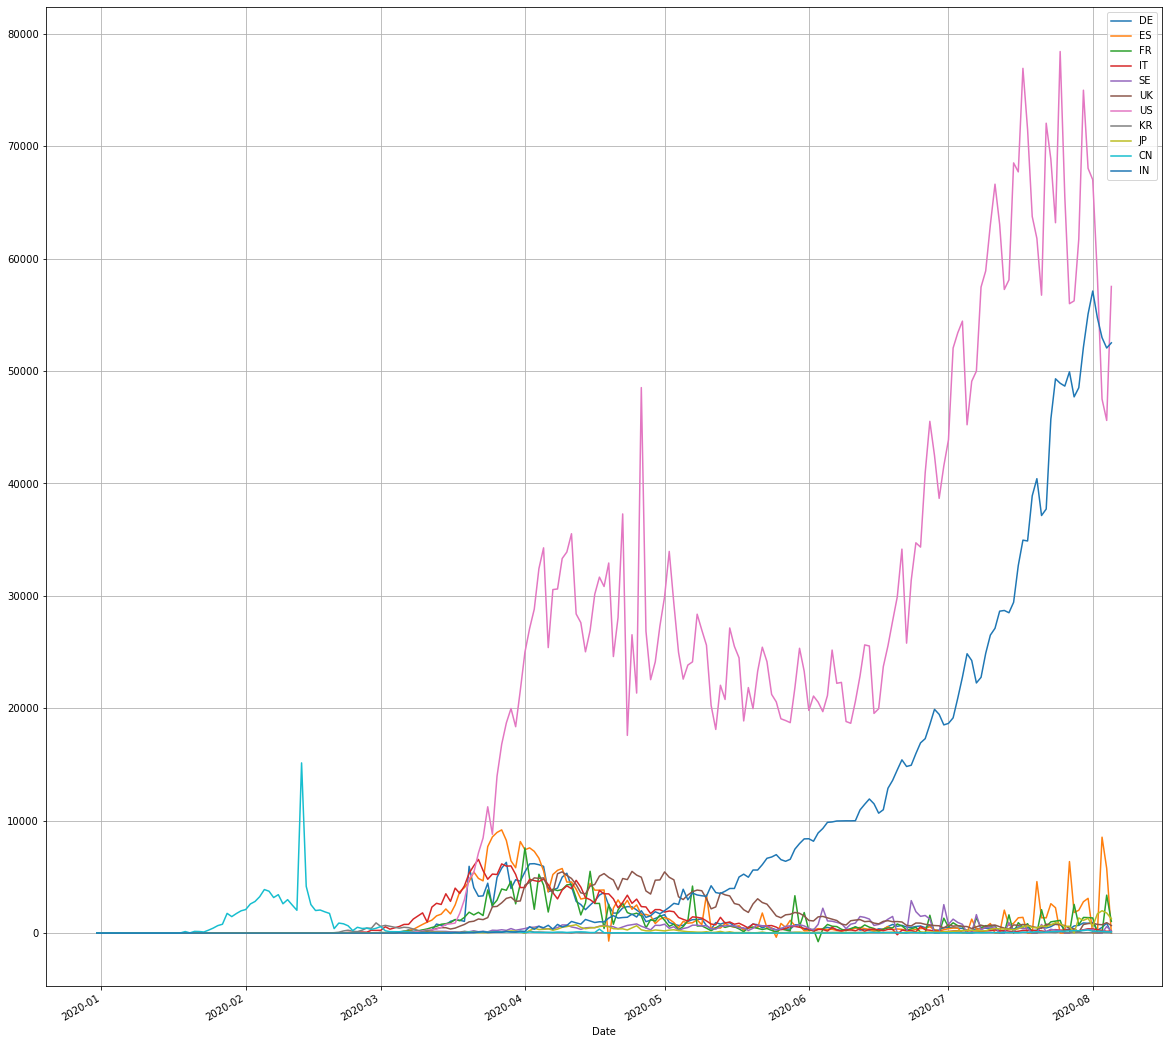

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

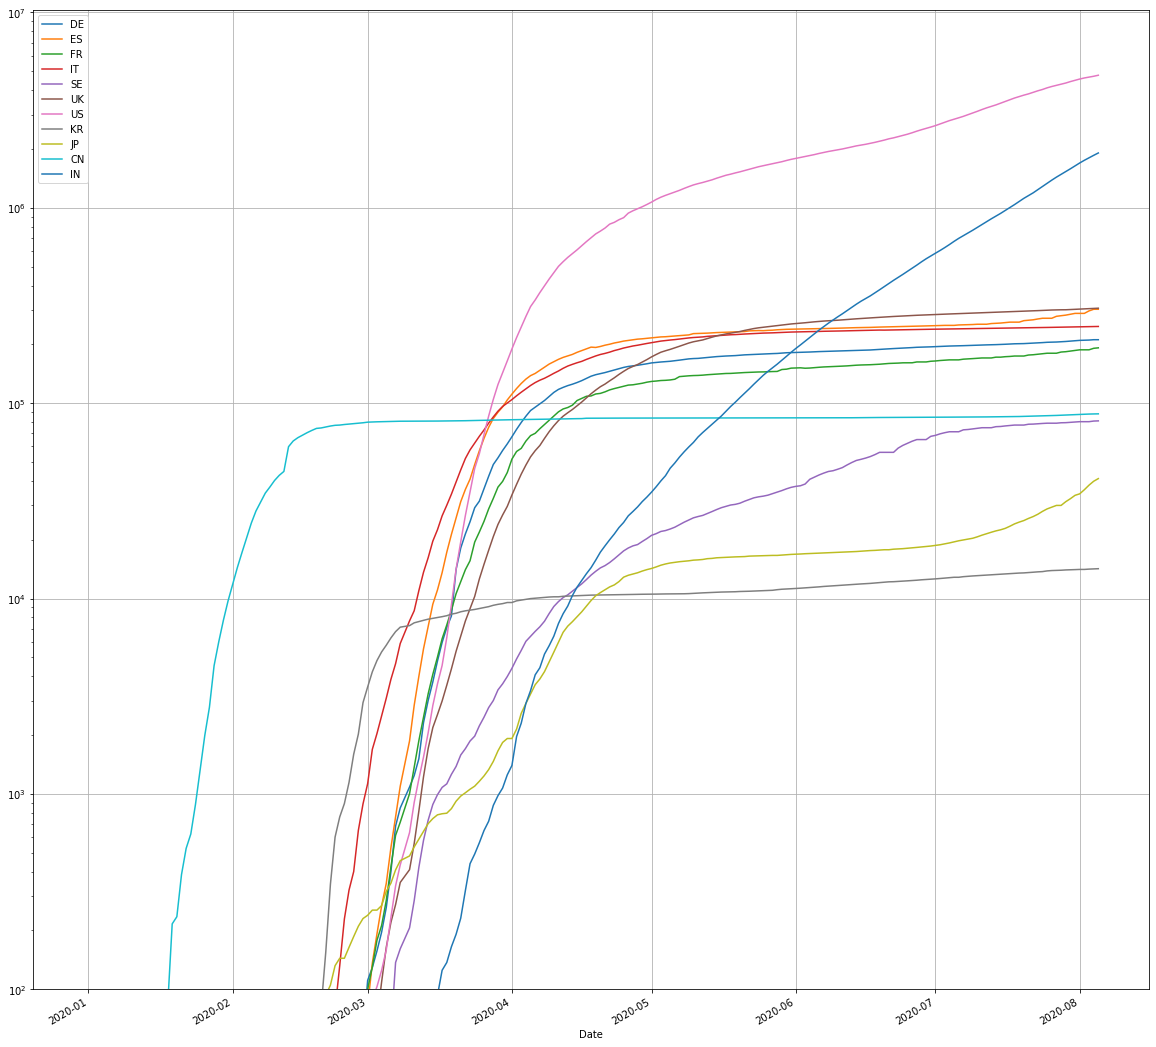

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 20), ylim=(100, None), grid=True)

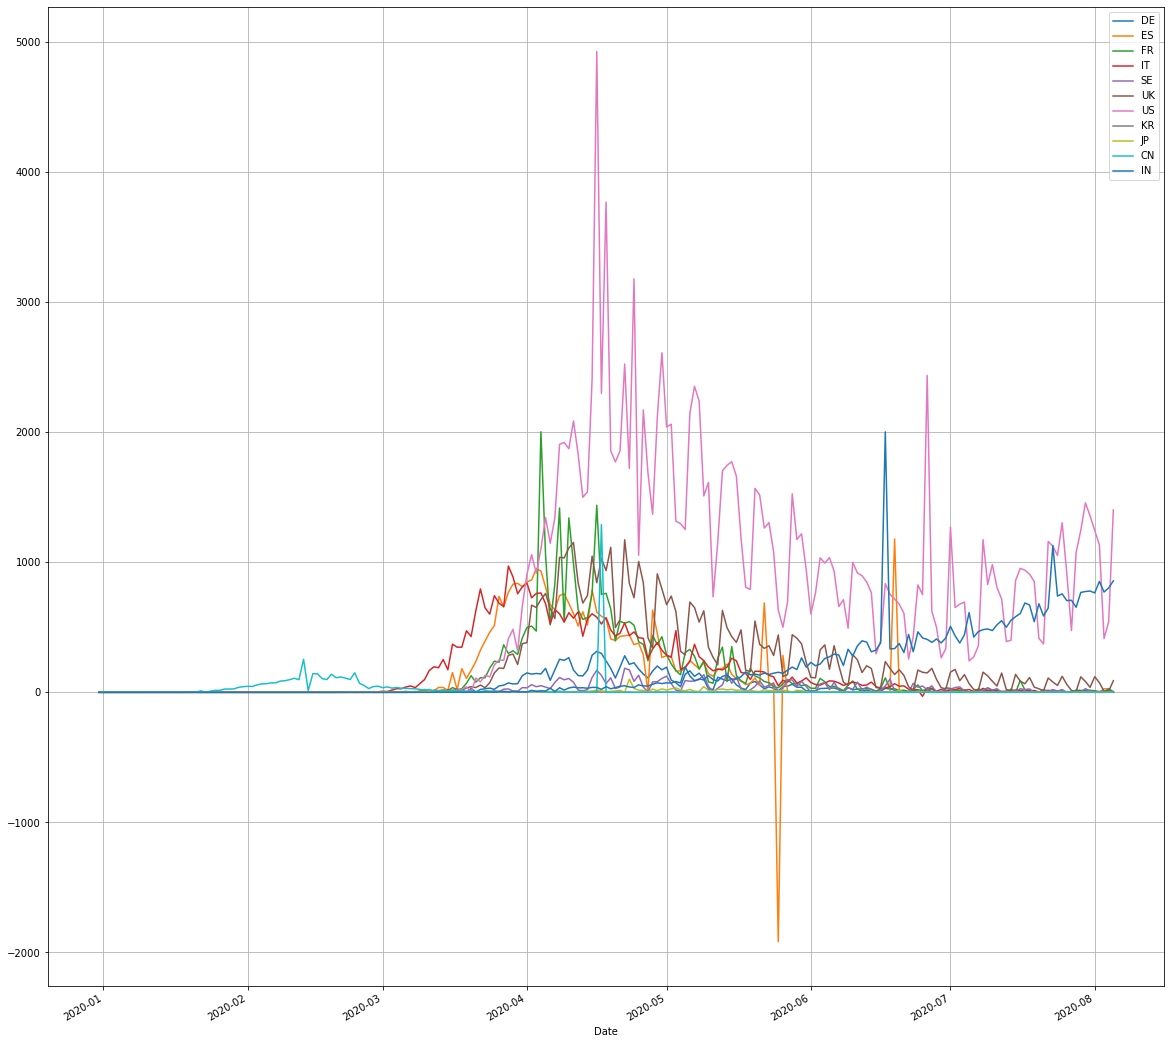

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

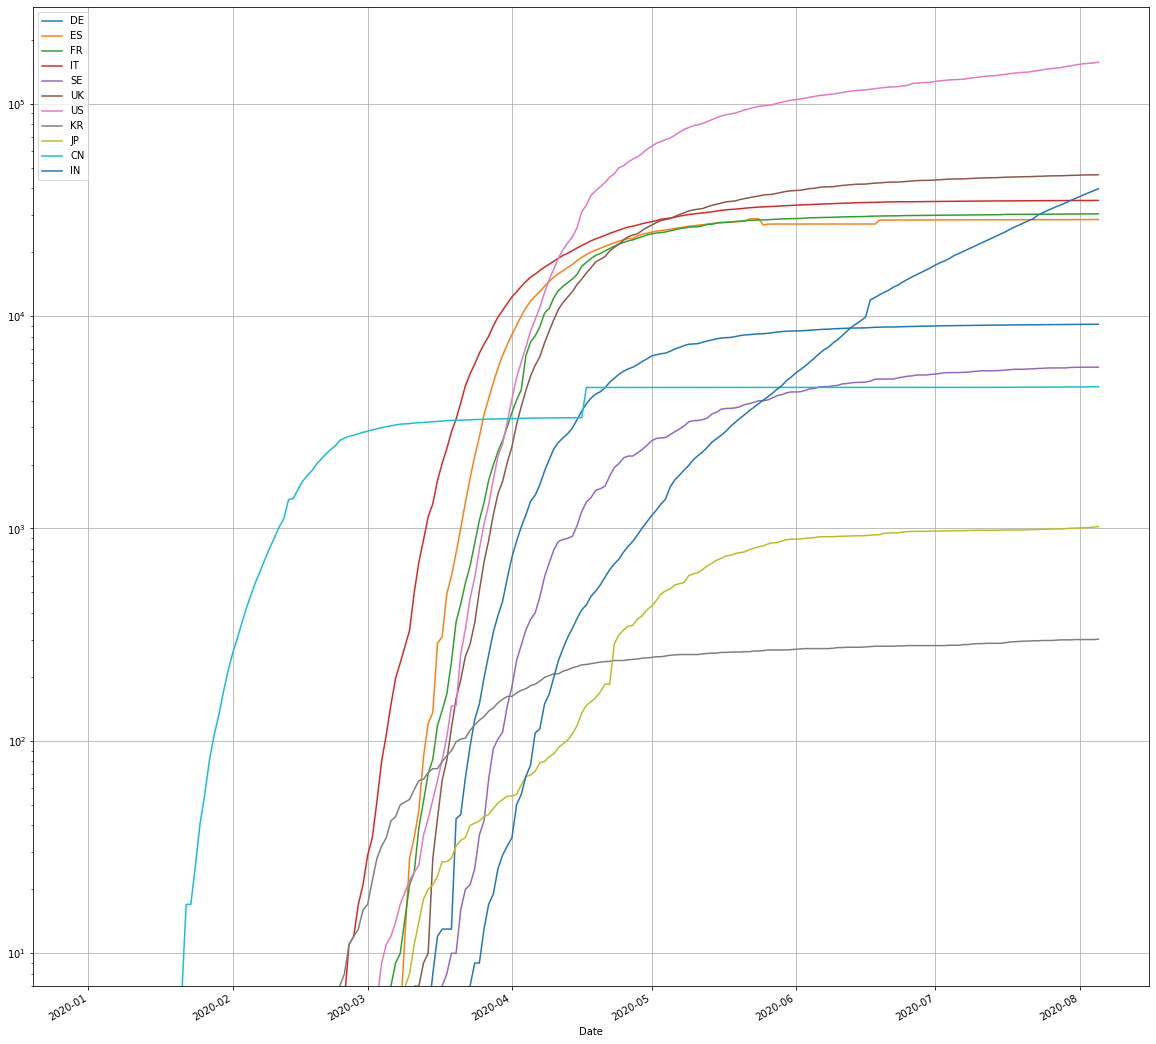

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 20), ylim=(7, None), grid=True)

In [7]:
cases.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-07-22,454.0,1357.0,584,128,118,793,72048,63,567,74,37724
12,2020-07-23,569.0,2615.0,998,280,338,751,68848,59,726,135,45720
11,2020-07-24,815.0,2255.0,1062,306,259,773,63196,41,927,139,49310
10,2020-07-25,781.0,0.0,1130,252,234,731,78427,113,830,157,48916
9,2020-07-26,305.0,0.0,0,274,0,667,65498,58,596,179,48661
8,2020-07-27,340.0,6361.0,0,254,0,421,55993,25,607,189,49931
7,2020-07-28,633.0,1828.0,2551,168,398,371,56243,28,0,213,47703
6,2020-07-29,684.0,2031.0,725,202,99,70,61734,48,1344,207,48513
5,2020-07-30,902.0,2789.0,1392,288,288,763,74985,18,1126,223,52123
4,2020-07-31,870.0,3092.0,1377,382,318,846,68032,36,1315,276,55078


In [8]:
sumCases.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-07-22,202744.0,267118.0,176928.0,243260.0,78124.0,296848.0,3901937.0,13631.0,26270.0,85726.0,1192915.0
2020-07-23,203313.0,269733.0,177926.0,243540.0,78462.0,297599.0,3970785.0,13690.0,26996.0,85861.0,1238635.0
2020-07-24,204128.0,271988.0,178988.0,243846.0,78721.0,298372.0,4033981.0,13731.0,27923.0,86000.0,1287945.0
2020-07-25,204909.0,271988.0,180118.0,244098.0,78955.0,299103.0,4112408.0,13844.0,28753.0,86157.0,1336861.0
2020-07-26,205214.0,271988.0,180118.0,244372.0,78955.0,299770.0,4177906.0,13902.0,29349.0,86336.0,1385522.0
2020-07-27,205554.0,278349.0,180118.0,244626.0,78955.0,300191.0,4233899.0,13927.0,29956.0,86525.0,1435453.0
2020-07-28,206187.0,280177.0,182669.0,244794.0,79353.0,300562.0,4290142.0,13955.0,29956.0,86738.0,1483156.0
2020-07-29,206871.0,282208.0,183394.0,244996.0,79452.0,300632.0,4351876.0,14003.0,31300.0,86945.0,1531669.0
2020-07-30,207773.0,284997.0,184786.0,245284.0,79740.0,301395.0,4426861.0,14021.0,32426.0,87168.0,1583792.0


In [9]:
deaths.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-07-22,5.0,2.0,0,15,7,110,1160,1,1,2,648
12,2020-07-23,6.0,3.0,7,9,21,79,1124,0,1,0,1129
11,2020-07-24,10.0,3.0,10,10,9,53,1052,1,2,1,740
10,2020-07-25,7.0,0.0,10,5,21,123,1304,0,1,1,757
9,2020-07-26,0.0,0.0,0,5,0,61,914,0,3,2,705
8,2020-07-27,0.0,2.0,0,5,0,14,475,1,0,0,708
7,2020-07-28,4.0,2.0,17,5,3,7,1076,1,0,4,654
6,2020-07-29,6.0,5.0,14,11,2,119,1245,0,4,1,768
5,2020-07-30,6.0,2.0,15,6,28,83,1457,0,3,2,775
4,2020-07-31,7.0,2.0,16,3,9,38,1357,1,2,0,779


In [10]:
sumDeaths.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-07-22,9095.0,28426.0,30156.0,34940.0,5646.0,45422.0,142062.0,296.0,988.0,4625.0,28732.0
2020-07-23,9101.0,28429.0,30163.0,34949.0,5667.0,45501.0,143186.0,296.0,989.0,4625.0,29861.0
2020-07-24,9111.0,28432.0,30173.0,34959.0,5676.0,45554.0,144238.0,297.0,991.0,4626.0,30601.0
2020-07-25,9118.0,28432.0,30183.0,34964.0,5697.0,45677.0,145542.0,297.0,992.0,4627.0,31358.0
2020-07-26,9118.0,28432.0,30183.0,34969.0,5697.0,45738.0,146456.0,297.0,995.0,4629.0,32063.0
2020-07-27,9118.0,28434.0,30183.0,34974.0,5697.0,45752.0,146931.0,298.0,995.0,4629.0,32771.0
2020-07-28,9122.0,28436.0,30200.0,34979.0,5700.0,45759.0,148007.0,299.0,995.0,4633.0,33425.0
2020-07-29,9128.0,28441.0,30214.0,34990.0,5702.0,45878.0,149252.0,299.0,999.0,4634.0,34193.0
2020-07-30,9134.0,28443.0,30229.0,34996.0,5730.0,45961.0,150709.0,299.0,1002.0,4636.0,34968.0
